In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(filename="info.log", 
                    filemode="w", 
                    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s", 
                    level=logging.INFO)

In [2]:
%load_ext autoreload
%autoreload 2

# Reading DataFrame

In [3]:
df = pd.read_csv("data/CARGA_ENERGIA_2022.csv", sep=";", encoding="utf-8")

df_pivot = df.pivot_table(
    values=["val_cargaenergiamwmed"],
    index=["din_instante"],
    columns=["id_subsistema", "nom_subsistema"],
)

# Preprocessing

In [4]:
from utils.dataframe_tools import data_clean, replace_zero_negative

In [5]:
df_pivot = data_clean(df_pivot)

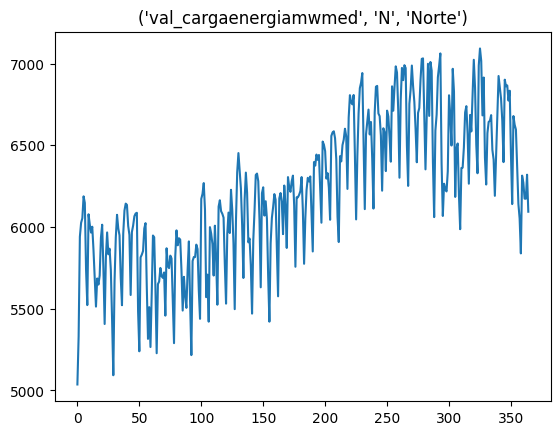

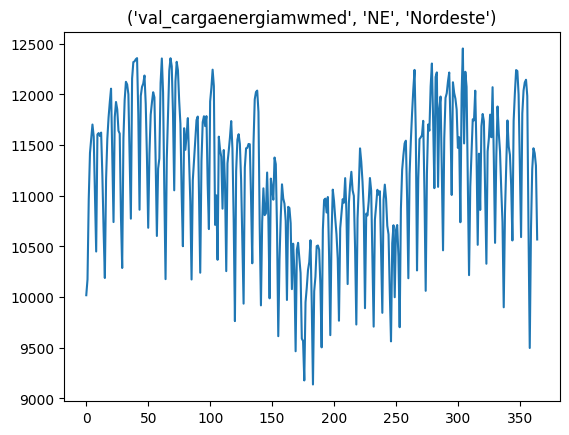

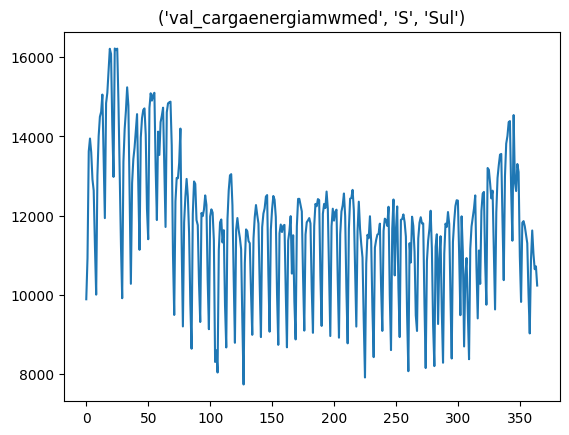

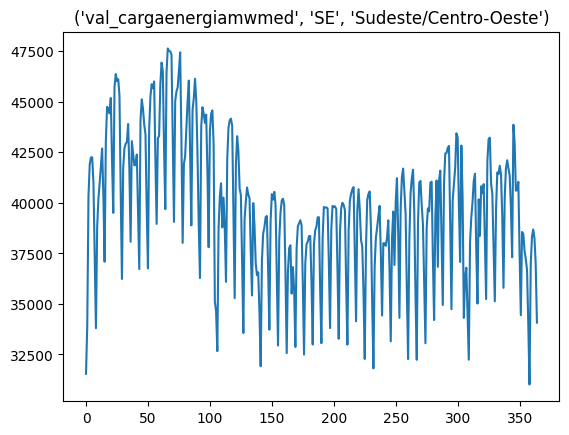

In [6]:
size = len(df_pivot.index)
x = np.arange(size)
for region in df_pivot.columns:
    plt.title(region)
    plt.plot(x, df_pivot[region])
    plt.show()
